In [1]:
import pandas as pd

Ratebeer_path = lambda path: f"{path}/Ratebeer"
BeerAdvocate_path = lambda path: f"{path}/BeerAdvocate"
Matched_path = lambda path: f"{path}/MatchedBeerData"
clean_path = "data/clean"

### Regression analysis

In [33]:
from src.data.additional_data import *
from src.utils.data_utils import *

def get_merged_additional():
    # age_path = 'data/raw/GeneralPopulationAge/DECENNIALDP2020.DP1-2024-11-14T134434.csv'
    # age_total, age_male, age_female = load_age_data(age_path, load_gender = True)
    # #print(age_total.head(5))

    icpsr_path = 'data/raw/OPENICPSR/OPENICPSR_apparent_per_capita_alcohol_consumption.csv'
    data_icpsr = load_icpsr(icpsr_path) # load + format data
    data_icpsr["2010"].state = data_icpsr["2010"].state.str.title()
    print(f'Shape ICPR : {data_icpsr["2010"].shape}')

    path = "data/raw/IncomeBEA/"
    filename = "GDP_PersonalIncome_USState.csv"
    BEO_income_index = {
        'RealGDP': 1, 
        'RealPI':2, 
        'RealPCE': 3,
        'GDP': 4,  
        'PI': 5, 
        'DPI': 6,
        'PCE': 7,
        'RealPI/cap': 8,
        'RealPCE/cap': 9,
        'PI/cap': 10,
        'DPI/cap': 11,
        'PCE/cap': 12     
        #13 14 15 useless
    }
    BEA = loadBEA(path, filename, BEO_income_index)
    BEA = get_mutliIndex_sub_df(BEA, ['RealPCE/cap', 'RealGDP', 'RealPI/cap'], ['2010']) 
    BEA.index = BEA.index.droplevel(1)
    # to have the same state name everywhere
    BEA.index = BEA.index.str.title()
    print(f'Shape BEA : {BEA.shape}' )

    census_path = 'data/raw/Census/'
    #file_name_2020 = 'DECENNIALCD1182020.H2_rural_urban_US.csv'
    file_name_2010 = 'DECENNIALCD1162010.H2_rural_urban_US.csv'


    #urban_2020_df = load_urban_frac_df(census_path, file_name_2020).reset_index()
    urban_2010_df = load_urban_frac_df(census_path, file_name_2010).reset_index()
    #print(urban_2010_df.head(5))
    urban_2010_df.state = urban_2010_df.state.str.title()
    print(f'Shape urban : {urban_2010_df.shape}' )

    merged = data_icpsr['2010'].merge(urban_2010_df, how='inner', on='state')

    # BEA.index = BEA.index.droplevel(1)
    merged = merged.merge(BEA, how='inner', left_on='state', right_on='State')
    merged = merged.rename(columns={"RealPCE/cap": "RealPCE_cap", "RealPI/cap": "RealPI_cap"}, errors="raise")
    merged['RealGDP_cap'] = merged['RealGDP'] / merged['total_pop'] # as GDP is dependant on number of people

    # there is now 51 states
    return merged
    print(merged.columns)
    print(merged.index)
    print(merged.head(5))


In [ ]:

merged = get_merged_additional()
print(merged.shape)

print(merged['state'].tolist())
#merged

Shape ICPR : (56, 3)
Shape BEA : (52, 3)
Shape urban : (52, 5)
(51, 11)
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


,state,ethanol_beer_gallons_per_capita,number_of_beers,total_pop,urban_pop,rural_pop,urban_frac,RealPCE_cap,RealGDP,RealPI_cap,RealGDP_cap
0,Alabama,1.17,277.333333,2171853,1267224,904629,0.583476,34044.0,199455.0,41757.0,0.091836
1,Alaska,1.23,291.555556,306967,182989,123978,0.596119,42794.0,53652.0,53121.0,0.174781
2,Arizona,1.23,291.555556,2844526,2515504,329022,0.884332,33721.0,282252.5,37162.0,0.099227
3,Arkansas,1.04,246.518519,1316299,720584,595715,0.547432,33101.0,113000.9,40280.0,0.085847
4,California,0.97,229.925926,13680081,12814688,865393,0.936741,35036.0,2153852.8,43519.0,0.157444
5,Colorado,1.22,289.185185,2212898,1838986,373912,0.831031,38298.0,279385.6,44902.0,0.126253
6,Connecticut,0.88,208.592593,1487891,1308541,179350,0.879460,42310.0,266773.4,63476.0,0.179296
7,Delaware,1.36,322.370370,405885,339111,66774,0.835485,40803.0,68291.9,44779.0,0.168254
8,District Of Columbia,1.22,289.185185,296719,296719,0,1.000000,55272.0,120393.2,61216.0,0.405748
9,Florida,1.12,265.481481,8989580,8190007,799573,0.911056,37592.0,851956.4,42760.0,0.094772


## to get user location for the reviews
### Mean on all beers, per state

In [41]:
# need to add column of beer rating
#ba_beers = pd.read_csv(f"{BeerAdvocate_path(clean_path)}/beers.csv")
def get_ba_beer_merged():
    ba_usa_ratings = pd.read_csv(f"{BeerAdvocate_path(clean_path)}/usa_ratings.csv")
    ba_usa_users = pd.read_csv(f"{BeerAdvocate_path(clean_path)}/usa_users.csv")

    ba_usa_ratings = ba_usa_ratings.merge(ba_usa_users[['user_id', 'location']], on='user_id', how='left')
    ba_usa_ratings['state'] = ba_usa_ratings['location'].apply(lambda x: x.split(', ')[-1])

    return ba_usa_ratings


In [42]:
ba_us_rat = get_ba_beer_merged()


reviews_by_state = ba_us_rat.groupby('state').mean(numeric_only=True).reset_index()
reviews_by_state = reviews_by_state.loc[:, ['state', 'appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']]
print(reviews_by_state.shape)
reviews_by_state.head(10)



(50, 7)


,state,appearance,aroma,palate,taste,overall,rating
0,Alabama,1.985127,1.946409,1.940104,1.968849,1.971101,3.825257
1,Alaska,2.720487,2.659565,2.677290,2.699465,2.701007,3.939863
2,Arizona,2.367727,2.338801,2.320451,2.351869,2.346162,3.905700
3,Arkansas,2.474807,2.488590,2.494775,2.535177,2.545868,3.852708
4,California,2.106001,2.077222,2.072086,2.091645,2.087826,3.937874
5,Colorado,2.397635,2.348576,2.357579,2.372742,2.374995,3.894112
6,Connecticut,2.339078,2.302994,2.306160,2.328021,2.322790,3.943980
7,Delaware,1.991498,1.972492,1.962322,1.999407,1.985769,3.934253
8,Florida,2.110438,2.074964,2.069940,2.094180,2.087962,3.901896
9,Georgia,2.317375,2.277256,2.279481,2.298809,2.300198,3.874257


In [38]:
from sklearn.preprocessing import StandardScaler

final_merged = merged.merge(reviews_by_state, how='inner', on='state')
print(final_merged.shape)
final_merged.head(5)
# scaler = StandardScaler()
# final_merged_scaled = pd.DataFrame(scaler.fit_transform(final_merged.iloc[:, 1:]), columns=final_merged.columns[1:])
# final_merged_scaled.insert(0, 'state', final_merged['state'])

# final_merged_scaled.head(5)

(50, 17)


,state,ethanol_beer_gallons_per_capita,number_of_beers,total_pop,urban_pop,rural_pop,urban_frac,RealPCE_cap,RealGDP,RealPI_cap,RealGDP_cap,appearance,aroma,palate,taste,overall,rating
0,Alabama,1.17,277.333333,2171853,1267224,904629,0.583476,34044.0,199455.0,41757.0,0.091836,1.985127,1.946409,1.940104,1.968849,1.971101,3.825257
1,Alaska,1.23,291.555556,306967,182989,123978,0.596119,42794.0,53652.0,53121.0,0.174781,2.720487,2.659565,2.677290,2.699465,2.701007,3.939863
2,Arizona,1.23,291.555556,2844526,2515504,329022,0.884332,33721.0,282252.5,37162.0,0.099227,2.367727,2.338801,2.320451,2.351869,2.346162,3.905700
3,Arkansas,1.04,246.518519,1316299,720584,595715,0.547432,33101.0,113000.9,40280.0,0.085847,2.474807,2.488590,2.494775,2.535177,2.545868,3.852708
4,California,0.97,229.925926,13680081,12814688,865393,0.936741,35036.0,2153852.8,43519.0,0.157444,2.106001,2.077222,2.072086,2.091645,2.087826,3.937874


In [39]:
import statsmodels.formula.api as smf

#ols_formula = 'rural_pop ~ total_pop + ethanol_beer_gallons_per_capita + number_of_beers + RealPCE_cap + RealGDP + RealPI_cap'
ols_formula = 'rating ~ urban_frac + ethanol_beer_gallons_per_capita + number_of_beers + RealPCE_cap +  RealPI_cap + RealGDP_cap'

mod = smf.ols(formula=ols_formula, data=final_merged)
res = mod.fit()
print(res.summary())




                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     5.309
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           0.000668
Time:                        15:46:10   Log-Likelihood:                 90.943
No. Observations:                  50   AIC:                            -169.9
Df Residuals:                      44   BIC:                            -158.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

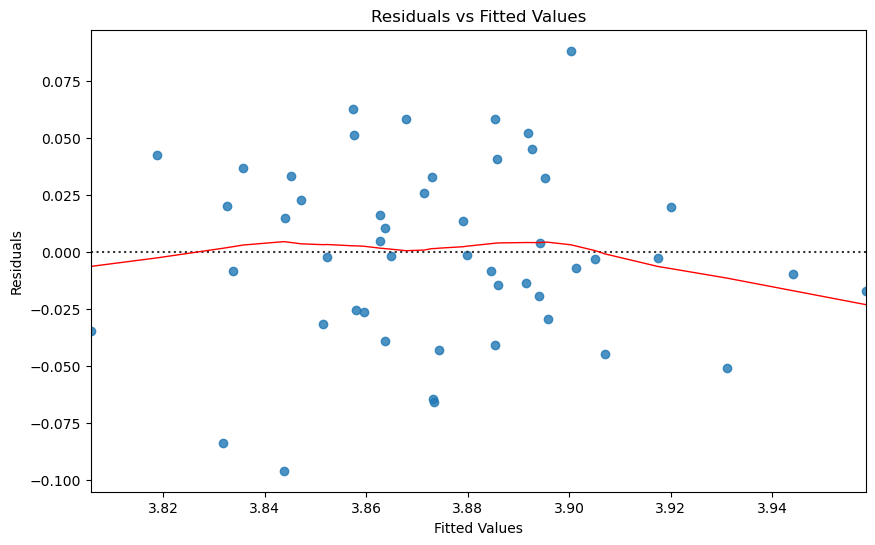

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = res.resid

# Plot residuals using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.residplot(x=res.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Beers in all states

## Then findeing the ones that have most variance between states

In [58]:
ba_usa_ratings = get_ba_beer_merged()

In [63]:
# grouped by beer and state
column_to_group = 'beer_name'

#ba_usa_ratings['state'] = ba_usa_ratings['location'].apply(lambda x: x.split(', ')[-1])
reviews_by_beer_state = ba_usa_ratings.groupby(['state', column_to_group]).mean(numeric_only=True).reset_index()
#reviews_by_state = ba_usa_ratings['abv', 'location'].groupby('location').mean()#.reset_index(name='review_count')
reviews_by_beer_state = reviews_by_beer_state.loc[:, ['state', column_to_group, 'appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']]
# to know how many got grouped
reviews_by_beer_state['review_count'] = ba_usa_ratings.groupby(['state', column_to_group]).size().values
reviews_by_beer_state = reviews_by_beer_state.loc[reviews_by_beer_state["review_count"] > 10]       # only more than 10 reviews by beer
reviews_by_beer_state.head(10)

,state,beer_name,appearance,aroma,palate,taste,overall,rating,review_count
5,Alabama,#9,0.945833,0.912500,0.908333,0.966667,0.975000,3.315000,60
31,Alabama,120 Minute IPA,1.984375,1.812500,1.992188,1.898438,1.757812,4.037813,32
39,Alabama,1554 Black Lager,2.401316,2.296053,2.375000,2.375000,2.414474,3.852895,38
48,Alabama,17th Anniversary Götterdämmerung IPA,0.303571,0.285714,0.285714,0.285714,0.303571,4.076429,14
106,Alabama,2XIPA,1.669643,1.750000,1.651786,1.750000,1.723214,3.883214,28
111,Alabama,2XSTOUT,1.684211,1.618421,1.565789,1.631579,1.618421,3.771579,19
126,Alabama,30A Beach Blonde Ale,3.057692,2.711538,2.826923,2.846154,2.846154,3.423077,13
134,Alabama,312 Urban Wheat,0.875000,0.803571,0.875000,0.830357,0.857143,3.353214,28
147,Alabama,400 Pound Monkey,0.919643,0.964286,0.910714,0.973214,1.026786,3.466429,28
155,Alabama,4th Anniversary Chocolate Coconut Almond Imper...,4.437500,4.229167,4.312500,4.437500,4.375000,4.365000,12


Shape ICPR : (56, 3)
Shape BEA : (52, 3)
Shape urban : (52, 5)
        state  ethanol_beer_gallons_per_capita  number_of_beers  total_pop  \
0     Alabama                             1.17       277.333333    2171853   
1     Alabama                             1.17       277.333333    2171853   
2     Alabama                             1.17       277.333333    2171853   
3     Alabama                             1.17       277.333333    2171853   
4     Alabama                             1.17       277.333333    2171853   
...       ...                              ...              ...        ...   
4916  Wyoming                             1.33       315.259259     261868   
4917  Wyoming                             1.33       315.259259     261868   
4918  Wyoming                             1.33       315.259259     261868   
4919  Wyoming                             1.33       315.259259     261868   
4920  Wyoming                             1.33       315.259259     261868   



In [64]:
vc = reviews_by_beer_state[column_to_group].value_counts()

min_states = 35

find_diff_beers = reviews_by_beer_state[reviews_by_beer_state[column_to_group].isin(vc[vc >= min_states].index)]
find_diff_beers

,state,beer_name,appearance,aroma,palate,taste,overall,rating,review_count
5,Alabama,#9,0.945833,0.912500,0.908333,0.966667,0.975000,3.315000,60
31,Alabama,120 Minute IPA,1.984375,1.812500,1.992188,1.898438,1.757812,4.037813,32
39,Alabama,1554 Black Lager,2.401316,2.296053,2.375000,2.375000,2.414474,3.852895,38
106,Alabama,2XIPA,1.669643,1.750000,1.651786,1.750000,1.723214,3.883214,28
134,Alabama,312 Urban Wheat,0.875000,0.803571,0.875000,0.830357,0.857143,3.353214,28
...,...,...,...,...,...,...,...,...,...
1020838,Wyoming,Sierra Nevada Celebration Ale,2.083333,1.783333,1.850000,1.966667,1.916667,4.036667,15
1020852,Wyoming,Sierra Nevada Pale Ale,1.583333,1.562500,1.583333,1.604167,1.645833,3.984167,12
1020859,Wyoming,Sierra Nevada Torpedo Extra IPA,2.083333,1.979167,2.125000,2.062500,2.062500,4.039167,12
1021234,Wyoming,Stone Ruination IPA,1.227273,1.204545,1.204545,1.272727,1.227273,4.065455,11


In [ ]:
#print(reviews_by_beer_state[reviews_by_beer_state['beer_name'] == 'Old Rasputin Russian Imperial Stout'])
#reviews_by_beer_state.head(10)
#reviews_by_beer_state[reviews_by_beer_state['beer_name'] == 'Samuel Adams Cherry Wheat']

### Find the beers with most variance

In [ ]:
rating_std = find_diff_beers.groupby(column_to_group)['rating'].std().reset_index()

# Sort the beers by the standard deviation in descending order
rating_std_sorted = rating_std.sort_values(by='rating', ascending=False)
rating_std_similar = rating_std.sort_values(by='rating', ascending=True)

# Display the top beers with the highest rating differences
top_beer_rating_diff = rating_std_sorted.head(10)[column_to_group].tolist()
top_beer_rating_same = rating_std_similar.head(10)[column_to_group].tolist()
print(top_beer_rating_diff)
print(rating_std_sorted.head(10))
print(rating_std_similar.head(10))


['Samuel Adams Cherry Wheat', 'Michelob Ultra', "Not Your Father's Root Beer (5.9%)", "Foster's Lager", 'Keystone Light', 'Dos Equis Special Lager', 'Miller High Life', 'Bud Light Lime', 'Rolling Rock Extra Pale', 'Corona Light']
                              beer_name    rating
274           Samuel Adams Cherry Wheat  0.197214
197                      Michelob Ultra  0.163110
216  Not Your Father's Root Beer (5.9%)  0.162986
109                      Foster's Lager  0.158394
174                      Keystone Light  0.157002
87              Dos Equis Special Lager  0.154061
201                    Miller High Life  0.149371
55                       Bud Light Lime  0.148969
263             Rolling Rock Extra Pale  0.147830
72                         Corona Light  0.146692
                                   beer_name    rating
120                  Founders Imperial Stout  0.045374
342                             Supplication  0.046786
52                             Brown Shugga'  0.047730


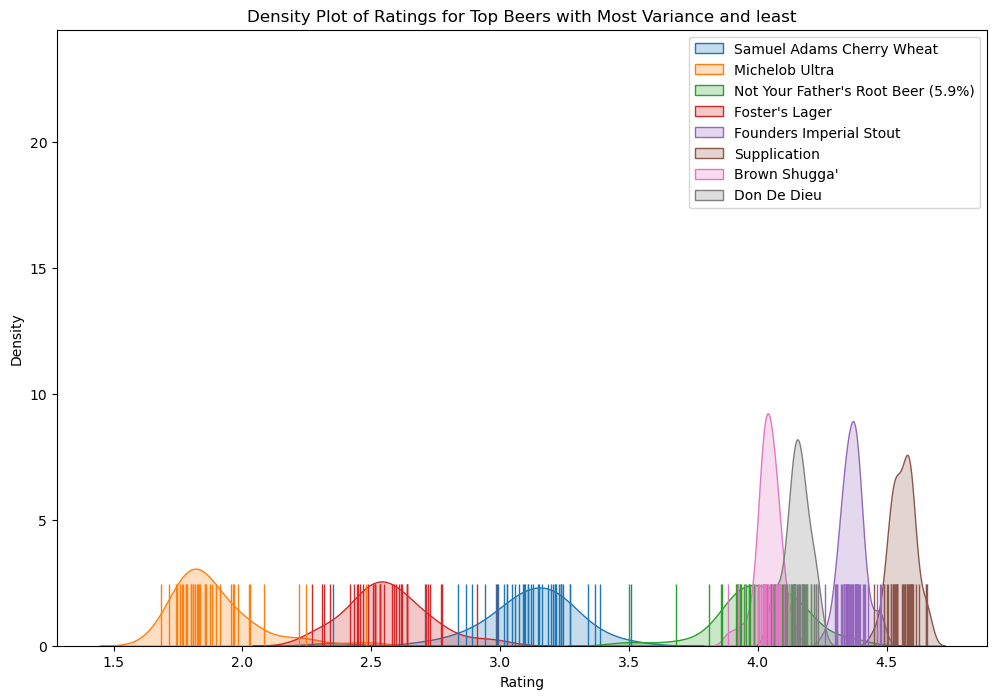

In [66]:
import seaborn as sns

plt.figure(figsize=(12, 8))

for beer in top_beer_rating_diff[0:4]:
    df = reviews_by_beer_state[reviews_by_beer_state[column_to_group] == beer]
    sns.kdeplot(df['rating'], label=beer, fill=True)
    sns.rugplot(df['rating'], height=0.1)

for beer in top_beer_rating_same[0:4]:
    df = reviews_by_beer_state[reviews_by_beer_state[column_to_group] == beer]
    sns.kdeplot(df['rating'], label=beer, fill=True)
    sns.rugplot(df['rating'], height=0.1)

plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Density Plot of Ratings for Top Beers with Most Variance and least')
plt.legend()
plt.show()

## Merging demographic with most differentiating beers

In [68]:
demographic_df = get_merged_additional()

final_merged = demographic_df.merge(reviews_by_beer_state, how='inner', on='state')
final_merged

Shape ICPR : (56, 3)
Shape BEA : (52, 3)
Shape urban : (52, 5)


,state,ethanol_beer_gallons_per_capita,number_of_beers,total_pop,urban_pop,rural_pop,urban_frac,RealPCE_cap,RealGDP,RealPI_cap,RealGDP_cap,beer_name,appearance,aroma,palate,taste,overall,rating,review_count
0,Alabama,1.17,277.333333,2171853,1267224,904629,0.583476,34044.0,199455.0,41757.0,0.091836,#9,0.945833,0.912500,0.908333,0.966667,0.975000,3.315000,60
1,Alabama,1.17,277.333333,2171853,1267224,904629,0.583476,34044.0,199455.0,41757.0,0.091836,120 Minute IPA,1.984375,1.812500,1.992188,1.898438,1.757812,4.037813,32
2,Alabama,1.17,277.333333,2171853,1267224,904629,0.583476,34044.0,199455.0,41757.0,0.091836,1554 Black Lager,2.401316,2.296053,2.375000,2.375000,2.414474,3.852895,38
3,Alabama,1.17,277.333333,2171853,1267224,904629,0.583476,34044.0,199455.0,41757.0,0.091836,17th Anniversary Götterdämmerung IPA,0.303571,0.285714,0.285714,0.285714,0.303571,4.076429,14
4,Alabama,1.17,277.333333,2171853,1267224,904629,0.583476,34044.0,199455.0,41757.0,0.091836,2XIPA,1.669643,1.750000,1.651786,1.750000,1.723214,3.883214,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124691,Wyoming,1.33,315.259259,261868,162874,98994,0.621970,39344.0,39135.8,53752.0,0.149449,Sierra Nevada Pale Ale,1.583333,1.562500,1.583333,1.604167,1.645833,3.984167,12
124692,Wyoming,1.33,315.259259,261868,162874,98994,0.621970,39344.0,39135.8,53752.0,0.149449,Sierra Nevada Torpedo Extra IPA,2.083333,1.979167,2.125000,2.062500,2.062500,4.039167,12
124693,Wyoming,1.33,315.259259,261868,162874,98994,0.621970,39344.0,39135.8,53752.0,0.149449,Stone Ruination IPA,1.227273,1.204545,1.204545,1.272727,1.227273,4.065455,11
124694,Wyoming,1.33,315.259259,261868,162874,98994,0.621970,39344.0,39135.8,53752.0,0.149449,The Abyss,0.886364,0.840909,0.863636,0.886364,0.863636,4.669091,11


In [71]:
import statsmodels.formula.api as smf

#ols_formula = 'rural_pop ~ total_pop + ethanol_beer_gallons_per_capita + number_of_beers + RealPCE_cap + RealGDP + RealPI_cap'
ols_formula = 'rating ~ urban_frac + ethanol_beer_gallons_per_capita + number_of_beers + RealPCE_cap + RealPI_cap + RealGDP_cap'



for beer in top_beer_rating_diff[0:4]:
    df = final_merged[final_merged[column_to_group] == beer]
    mod = smf.ols(formula=ols_formula, data=df)
    res = mod.fit()
    print(f'\n\n Regression result for the beer {beer}')
    print(res.summary())





 Regression result for the beer Samuel Adams Cherry Wheat
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     1.913
Date:                Wed, 11 Dec 2024   Prob (F-statistic):              0.117
Time:                        16:32:19   Log-Likelihood:                 13.844
No. Observations:                  41   AIC:                            -15.69
Df Residuals:                      35   BIC:                            -5.407
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------